# Teoria de Señales  2024-1
## Edward Fabian Goyeneche Velandia -Ingenieria Electronica.
### Universidad Nacional de Colombia - Sede Manizales.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.neural_network import MLPRegressor 
from scipy. signal import welch


### Señal  Original  $\frac{1}{3}$

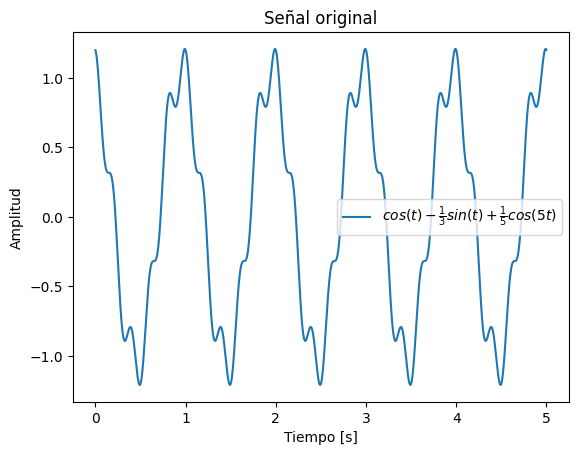

In [3]:
import numpy as np

# Generar la señal original
def generate_original_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

fs = 1000
T = 5
w = 2 * np.pi
t = np.linspace(0, T, int(fs * T), endpoint=False)

original_signal = generate_original_signal(w, t)


plt.plot(t, original_signal)
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])
plt.show()



### Matriz de la señal con distinto Ruido Blanco Gaussiano

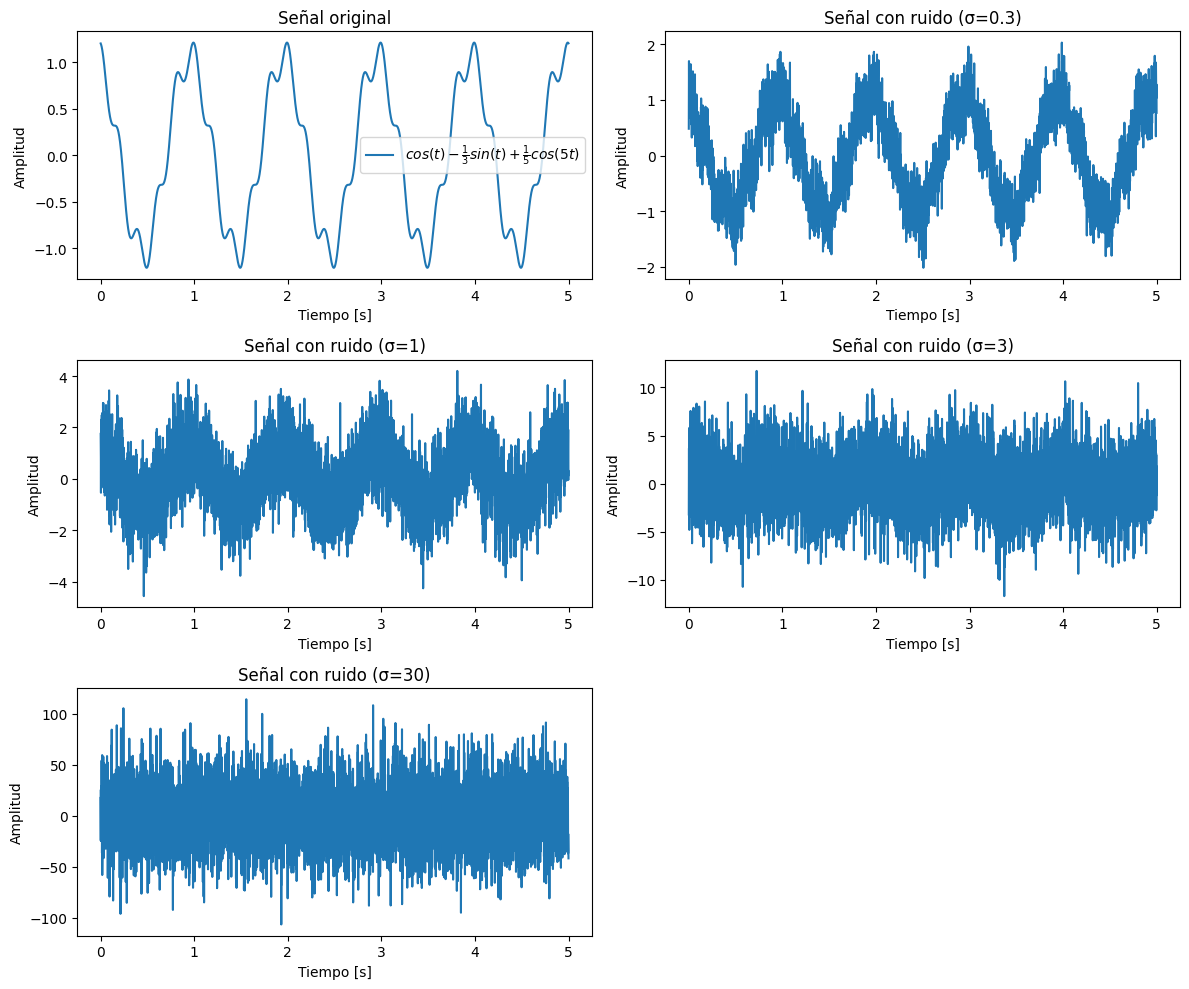

[[  1.2          1.19778719   1.19533771 ...   1.20521756   1.20371507
    1.20197595]
 [  0.4822459    1.10858143   1.69916453 ...   1.23141887   1.27565992
    0.76840416]
 [  1.75050502   1.3003262    0.82508047 ...  -0.04395947   1.12521048
    1.88036618]
 [ -3.1983082    0.71767694   3.68047057 ...   1.82698139   1.38331119
   -0.29835986]
 [ 17.52428629 -24.27770886  25.52122533 ... -28.75257753 -30.76991903
  -41.73363207]]
(5, 5000)


In [13]:

noise_levels=[ 0.3,1,3,30]

signal_matrix = np.zeros((len(noise_levels),+1, len(t)))
signal_matrix[0,:]= original_signal



signals_matrix = np.zeros((len(noise_levels) + 1, len(t)))
signals_matrix[0, :] = original_signal

# Añadir ruido y almacenar en la matriz
for i, noise_level in enumerate(noise_levels):
    noisy_signal = original_signal + np.random.normal(0, noise_level, original_signal.shape)
    signals_matrix[i + 1, :] = noisy_signal


plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(t, signals_matrix[0, :])
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])

for i, noise_level in enumerate(noise_levels):
    plt.subplot(3, 2, i + 2)
    plt.plot(t, signals_matrix[i + 1, :])
    plt.title(f"Señal con ruido (σ={noise_level})")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print (signals_matrix)
print (signals_matrix.shape)

### Aplica Welch

Matriz de PSDs:
[[1.19427999e-01 3.89336929e-01 1.01981351e-01 ... 1.21526796e-22
  8.95354634e-23 3.94362379e-23]
 [1.19522519e-01 3.88225439e-01 1.00739012e-01 ... 7.22282982e-05
  1.08448843e-04 2.89079039e-05]
 [1.23135965e-01 3.88897892e-01 1.01934106e-01 ... 2.52678162e-03
  2.40626552e-03 1.07476062e-03]
 [1.41676311e-01 4.99221124e-01 1.47063456e-01 ... 1.98970072e-02
  3.24718907e-02 1.67373177e-02]
 [4.90003970e-01 2.40073644e+00 2.91767780e+00 ... 1.90325070e+00
  2.92801121e+00 1.73759454e+00]]


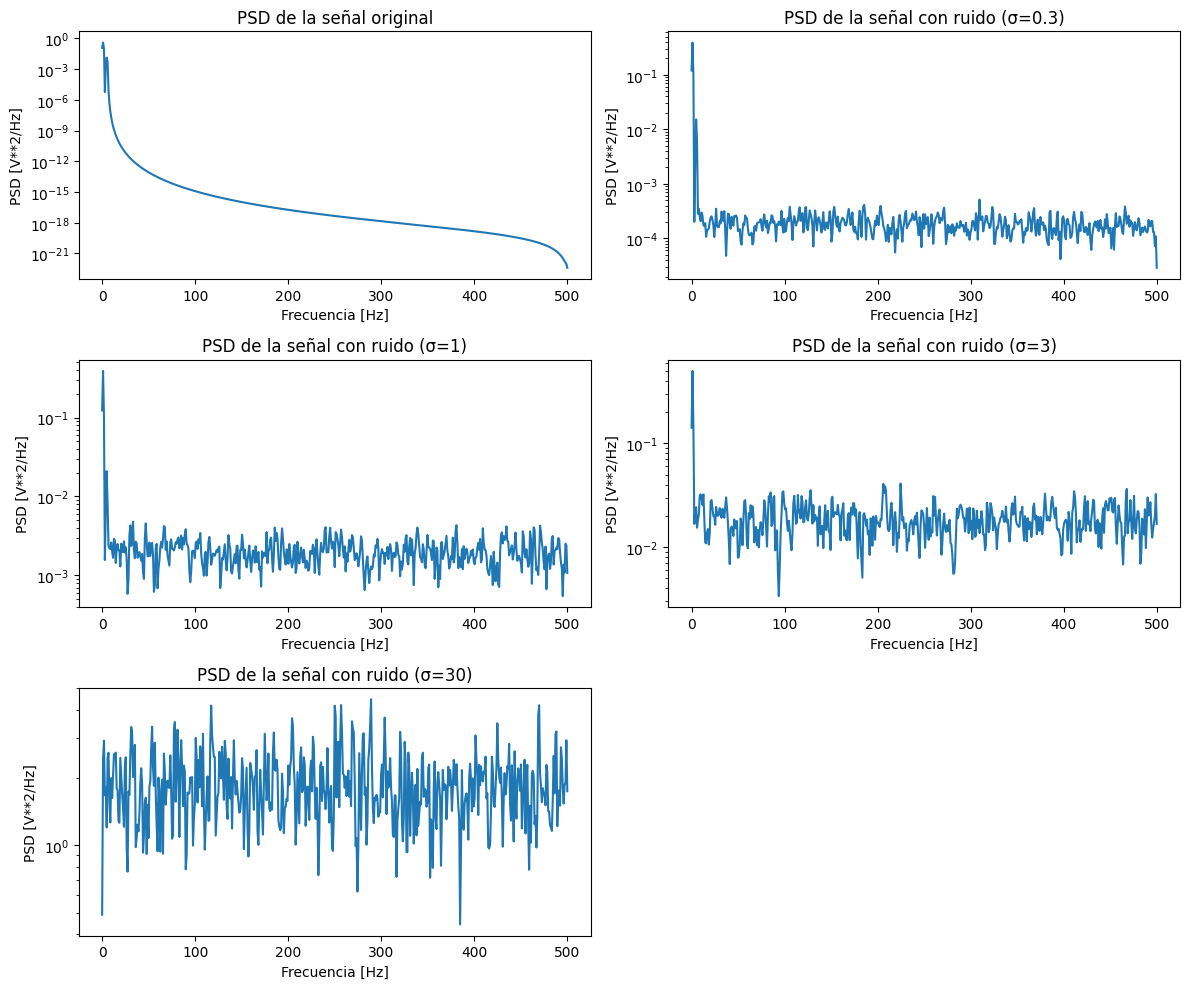

(5, 513)


In [12]:
psd_matrix = []
frequencies = None

for i in range(signals_matrix.shape[0]):
    f, Pxx = welch(signals_matrix[i, :], fs, nperseg=1024)
    if frequencies is None:
        frequencies = f
    psd_matrix.append(Pxx)

psd_matrix = np.array(psd_matrix)

# Imprimir la matriz de PSDs
print("Matriz de PSDs:")
print(psd_matrix)

# Graficar la PSD utilizando el método de Welch
plt.figure(figsize=(12, 10))
for i in range(psd_matrix.shape[0]):
    plt.subplot(3, 2, i + 1)
    plt.semilogy(frequencies, psd_matrix[i, :])
    if i == 0:
        plt.title("PSD de la señal original")
    else:
        plt.title(f"PSD de la señal con ruido (σ={noise_levels[i-1]})")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("PSD [V**2/Hz]")

plt.tight_layout()
plt.show()

print (psd_matrix.shape)

### Separa los datos de entrenamiento


In [15]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(signals_matrix, psd_matrix, test_size=0.2, random_state=42)

# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("Conjunto de prueba (X_test):")
print(X_test)
print("Etiquetas de entrenamiento (y_train):")
print(y_train)
print("Etiquetas de prueba (y_test):")
print(y_test)


Conjunto de entrenamiento (X_train):
[[ 17.52428629 -24.27770886  25.52122533 ... -28.75257753 -30.76991903
  -41.73363207]
 [  1.75050502   1.3003262    0.82508047 ...  -0.04395947   1.12521048
    1.88036618]
 [  1.2          1.19778719   1.19533771 ...   1.20521756   1.20371507
    1.20197595]
 [ -3.1983082    0.71767694   3.68047057 ...   1.82698139   1.38331119
   -0.29835986]]
Conjunto de prueba (X_test):
[[0.4822459  1.10858143 1.69916453 ... 1.23141887 1.27565992 0.76840416]]
Etiquetas de entrenamiento (y_train):
[[4.90003970e-01 2.40073644e+00 2.91767780e+00 ... 1.90325070e+00
  2.92801121e+00 1.73759454e+00]
 [1.23135965e-01 3.88897892e-01 1.01934106e-01 ... 2.52678162e-03
  2.40626552e-03 1.07476062e-03]
 [1.19427999e-01 3.89336929e-01 1.01981351e-01 ... 1.21526796e-22
  8.95354634e-23 3.94362379e-23]
 [1.41676311e-01 4.99221124e-01 1.47063456e-01 ... 1.98970072e-02
  3.24718907e-02 1.67373177e-02]]
Etiquetas de prueba (y_test):
[[1.19522519e-01 3.88225439e-01 1.00739012e-01

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

#Definir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Graficar la PSD real vs. la PSD predicha para una señal de prueba
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, y_test[0], label='PSD Real')
plt.semilogy(frequencies, y_pred[0], label='PSD Predicha')
plt.title('PSD Real vs. PSD Predicha')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

# Graficar las métricas de entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'distutils'